# Suite minimisante linéaire (duale)

L'objectif est de tracer l'évolution des énergies magnétiques dans l'axe $d$ et l'axe $q$ à flux fixé en fonction du nombre de barres, et de la comparer à celles d'un matériau anisotrope homogénéisé. La fraction volumique est fixée à $\rho = 0.5$ et n'est pas nécessairement optimale. 

In [1]:
# Enlever les  # pour que les figures s'ouvrent dans une fenêtre interactive à part

#%matplotlib qt5
from module_optim_topo import *
from copy import copy
#plt.ion()

In [2]:
# Grandeurs du problème
mur = 1000
phi_impose = 1
maxN=250

In [3]:
# Boucle de calcul

Jd_dual = []; Jq_dual = []; J_dual = []
barres = range(3,maxN+50,6)
for i in barres:
    
    # Génération du maillage comportant i barres de fer et d'air
    mesh = meshLamDisk(i, h = 1/maxN)
    
    # Résolution du problème éléments finis
    mu = mu_defaut(mur,mesh)
    ud, uq = solveDual_linear(mu,phi_impose,mesh)
    
    # Calcul des énergies magnétiques
    Jd_dual.append(compliance(ud,mu,mesh))
    Jq_dual.append(compliance(uq,mu,mesh))
    J_dual.append(Jq_dual[-1]-Jd_dual[-1])
    
    print(f'{i} barres - Jd = {np.round(Jd_dual[-1],2)} - Jq = {np.round(Jq_dual[-1])}')

3 barres - Jd = 127498.53 - Jq = 625626.0
9 barres - Jd = 44033.8 - Jq = 625626.0
15 barres - Jd = 27187.49 - Jq = 625626.0
21 barres - Jd = 20013.9 - Jq = 625626.0
27 barres - Jd = 16040.02 - Jq = 625626.0
33 barres - Jd = 13515.87 - Jq = 625626.0
39 barres - Jd = 11767.3 - Jq = 625626.0
45 barres - Jd = 10484.09 - Jq = 625626.0
51 barres - Jd = 9503.8 - Jq = 625626.0
57 barres - Jd = 8726.24 - Jq = 625626.0
63 barres - Jd = 8094.84 - Jq = 625626.0
69 barres - Jd = 7570.75 - Jq = 625626.0
75 barres - Jd = 7135.31 - Jq = 625626.0
81 barres - Jd = 6754.38 - Jq = 625626.0
87 barres - Jd = 6436.78 - Jq = 625626.0
93 barres - Jd = 6142.83 - Jq = 625626.0
99 barres - Jd = 5894.83 - Jq = 625626.0
105 barres - Jd = 5679.55 - Jq = 625626.0
111 barres - Jd = 5490.09 - Jq = 625626.0
117 barres - Jd = 5292.06 - Jq = 625626.0
123 barres - Jd = 5128.99 - Jq = 625626.0
129 barres - Jd = 4983.18 - Jq = 625626.0
135 barres - Jd = 4859.04 - Jq = 625626.0
141 barres - Jd = 4744.12 - Jq = 625626.0
147 ba

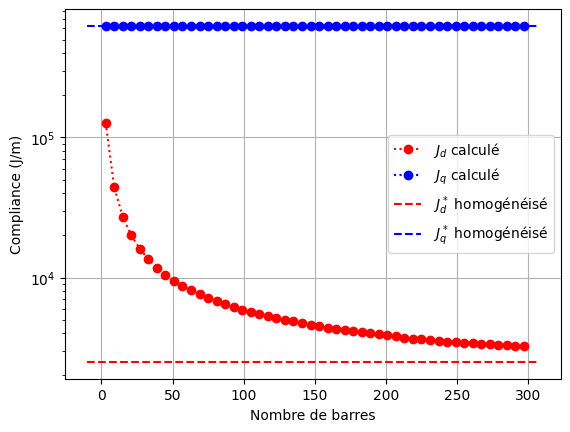

In [4]:
frac_vol = 0.5 # fraction volumique (fixée à 0.5)

# Réluctivités du matériau homogénéisé dans les axes d et q
nud = 1/((mu0*mur) * frac_vol  + mu0 * (1-frac_vol))
nuq = 1/(mu0*mur) * frac_vol + 1/mu0 *(1-frac_vol )

# Valeurs théoriques de l'énergie magnétique pour un matériau anisotrope
Jd_lamine = np.pi/2 *  nud * phi_impose**2 
Jq_lamine_dual = np.pi/2 * nuq * phi_impose**2 

# Tracé de l'évolution de l'énergie
plt.semilogy(list(barres),Jd_dual,'ro:',label = '$J_d$ calculé')
plt.semilogy(list(barres),Jq_dual,'bo:',label = '$J_q$ calculé')
plt.semilogy([-10,max(list(barres))+10],[Jd_lamine,Jd_lamine],'r--',label = '$J_d^*$ homogénéisé')
plt.semilogy([-10,max(list(barres))+10],[Jq_lamine_dual,Jq_lamine_dual],'b--',label = '$J_q^*$ homogénéisé')
plt.xlabel('Nombre de barres')
plt.ylabel('Compliance (J/m)')
plt.legend()
plt.grid()
plt.show()

In [5]:
# Tracé champ 5 barres
mesh = meshLamDisk(5, h = 1/maxN)
mu = mu_defaut(mur,mesh)
ud, uq = solveDual_linear(mu,phi_impose,mesh)
Draw(mu*grad(ud),mesh, min = 0, max = 2, vectors = { "grid_size":20},
     settings={'mesh' : False, 'colormap_ncolors' : 256})

WebGuiWidget(layout=Layout(height='50vh', width='100%'), value={'gui_settings': {'mesh': False, 'colormap_ncol…

BaseWebGuiScene

In [6]:
# Tracé champ 13 barres
mesh = meshLamDisk(13, h = 1/maxN)
mu = mu_defaut(mur,mesh)
ud, uq = solveDual_linear(mu,phi_impose,mesh)
Draw(mu*grad(ud),mesh, min = 0, max = 2, vectors = { "grid_size":20},
     settings={'mesh' : False, 'colormap_ncolors' : 256})

WebGuiWidget(layout=Layout(height='50vh', width='100%'), value={'gui_settings': {'mesh': False, 'colormap_ncol…

BaseWebGuiScene

In [7]:
# Tracé champ 51 barres
mesh = meshLamDisk(51, h = 1/maxN)
mu = mu_defaut(mur,mesh)
ud, uq = solveDual_linear(mu,phi_impose,mesh)
Draw(mu*grad(ud),mesh, min = 0, max = 2, vectors = { "grid_size":20},
     settings={'mesh' : False, 'colormap_ncolors' : 256})

WebGuiWidget(layout=Layout(height='50vh', width='100%'), value={'gui_settings': {'mesh': False, 'colormap_ncol…

BaseWebGuiScene